In [1]:
%matplotlib inline
import sys
sys.path.append('..')
import numpy as np
from pyqstem import PyQSTEM
from pyqstem.imaging import CTF
from pyqstem.util import atoms_plot
from ase.io import write,read
from ase.visualize import view
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
from temnn.data.dataset import DataEntry,DataSet
from glob import glob


In [4]:
def load(data_dir):
    "Load data folder."
    print("Data source:", data_dir)
    waves=sorted(glob(data_dir+"wave/wave_*.npz"))
    points=sorted(glob(data_dir+"points/points_*.npz"))
    #labels=sorted(glob(data_dir+"label/label_*.npy"))
    entries = [DataEntry(wave=w, points=p) for w,p in zip(waves,points)]
    if not len(entries):
        raise ValueError("The dataset appears to be emtpy!")
    return DataSet(entries)

In [5]:
folder = '../data/mos2-training/'
dataset = load(folder)

Data source: ../data/mos2-training/


In [17]:
entry = dataset.next_batch(1)[0]
entry.load()
wave = entry._wave.array

In [18]:
entry._sites.shape

(764, 2)

In [19]:
sampling = 0.1
Cs = 5e4
defocus = 50
ctf=CTF(defocus=defocus,Cs=Cs)
entry.create_image(ctf,sampling,0,1e4)
entry.create_label(sampling, width = int(.4/sampling), num_classes=2)
image,label=entry.as_tensors()
image = image[0,:,:,0]
label = label[0,:,:,:]
for i in range(3):
    label[:,:,i] /= label[:,:,i].max()
print(image.shape, label.shape)

(512, 512) (512, 512, 3)


In [20]:
[label[:,:,i].max() for i in range(3)]

[1.0, 1.0, 1.0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


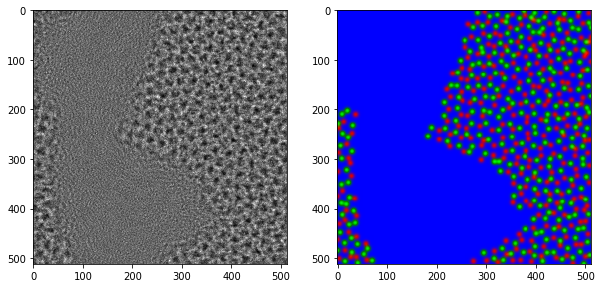

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
im1 = axes[0].imshow(image[:,:],cmap='gray')
im2 = axes[1].imshow(label[:,:,:],cmap='gray')